In [498]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,KFold

In [499]:
np.random.seed(0)

In [500]:
dogf_1 = np.random.normal(loc=8, scale=1.0, size=10)
dogf_2 = np.random.normal(loc=5, scale=1.0, size=10)
# print(dogf_1)
# print(dogf_2)

In [501]:
catf_1=np.random.normal(loc=5,scale=1.0,size=10)
catf_2=np.random.normal(loc=8,scale=1.0,size=10)
# print(catf_1)
# print(catf_2)

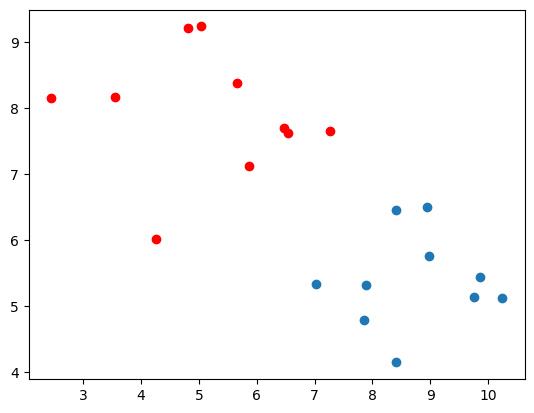

In [502]:
plt.scatter(dogf_1,dogf_2)
plt.scatter(catf_1,catf_2,color='Red')

In [503]:
def compute_err(dogs, cats, theta, theta0):
    err = 0
    for i in dogs:
        if np.dot(theta, i)+theta0 <= 0: 
        #    print(i)
           err += 1
    for j in cats:
        if np.dot(theta, j)+theta0 >= 0:
           err += 1
    return err

In [504]:
def rlc(dogs,cats,k,d):
    best_err=float('inf')
    best_theta=None
    best_theta0=None

    for _ in range(k):
        theta=np.random.normal(size=d) #[theta1 , theta2]
        theta0=np.random.normal()
        err=compute_err(dogs,cats,theta,theta0)
        
        if err<best_err:
            best_err=err
            best_theta=theta
            best_theta0=theta0
    return best_theta,best_theta0,best_err


In [505]:
# print(dogf_1)
# print(dogf_2)
dogs_data=np.vstack((dogf_1,dogf_2)).T
# print(dogs_data)
cats_data=np.vstack((catf_1,catf_2)).T
# print(cats_data)
data=np.vstack((dogs_data,cats_data))
# print(data)
labels=np.hstack((np.zeros(len(dogs_data)),np.ones(len(cats_data))))
# print(labels)

In [506]:
x_train,x_test,y_train,y_test=train_test_split(data,labels,test_size=0.2,random_state=42)
# print(y_train)

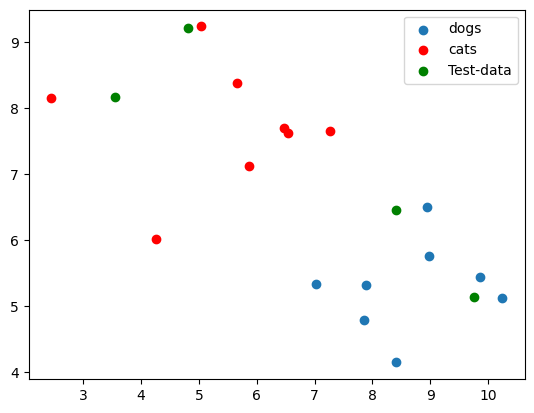

In [507]:
plt.scatter(x_train[y_train == 0][:,0],x_train[y_train ==0][:,1],label="dogs")
plt.scatter(x_train[y_train == 1][:,0],x_train[y_train ==1][:,1],label="cats",color="red")
plt.scatter(x_test[:,0],x_test[:,1],color="green",label="Test-data")
plt.legend()

In [508]:
k=100
d=2
best_theta_train,best_theta0_train,train_err=rlc(x_train[y_train==0],x_train[y_train==1],k,d)
# print(best_theta)
# print(best_theta0)
print(f"training error = {train_err}")


training error = 0


In [509]:
x_val=np.linspace(2,10,100)
y_val_train=(-best_theta_train[0]/best_theta_train[1])*x_val-(best_theta0_train/best_theta_train[1])

Text(0.5, 1.0, 'Training')

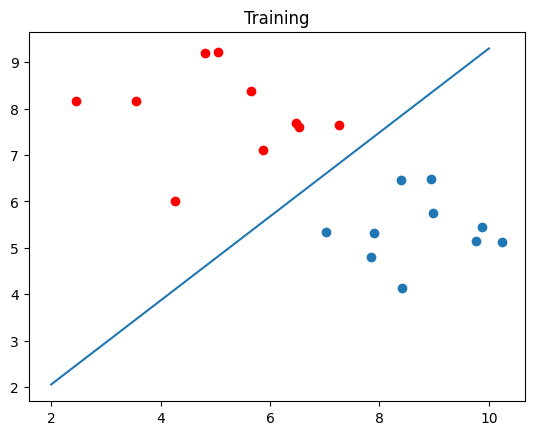

In [510]:
plt.scatter(dogf_1,dogf_2)
plt.scatter(catf_1,catf_2,color="Red")
plt.plot(x_val,y_val_train)
plt.title("Training")

In [511]:
test_err=compute_err(x_test[y_test==0],x_test[y_test==1],best_theta_train,best_theta0_train)
print(f"testing-error = {test_err}")

testing-error = 0
